In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from category_encoders import TargetEncoder
import seaborn as sns
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', None)

In [2]:
# grp_dict={
#     'data':'first',
#     'trip_creation_time':'last',
#     'route_schedule_uuid':'first',
#     'route_type':'first',
#     'source_name':'first',
#     'destination_name' :'last',
#     'od_start_time' : 'first',
#     'od_end_time' : 'last',
#     'start_scan_to_end_scan' : 'first',
#     'is_cutoff' : 'first',
#     'cutoff_factor' :'max',
#     'cutoff_timestamp' : 'first',
#     'actual_distance_to_destination':'last',
#     'actual_time' :'max',
#     'osrm_time':'max',
#     'osrm_distance':'max',
#     'factor':'max',
#     'segment_actual_time':'sum',
#     'segment_osrm_time':'sum',
#     'segment_osrm_distance':'sum',
#     'segment_factor':'max'
    
# }

In [3]:
data = pd.read_csv('delhivery_data.csv')

In [4]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# Aggregation on fields

In [5]:
grp_dict={
    'data':'first',
    'trip_creation_time':'last',
    'route_schedule_uuid':'first',
    'route_type':'first',
    'source_name':'first',
    'destination_name' :'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',
    'is_cutoff' : 'last',
    'cutoff_factor' :'last',
    'cutoff_timestamp' : 'first',
    'actual_distance_to_destination':'last',
    'actual_time' :'last',
    'osrm_time':'last',
    'osrm_distance':'last',
    'factor':'max',
    'segment_actual_time':'sum',
    'segment_osrm_time':'sum',
    'segment_osrm_distance':'sum',
    'segment_factor':'last'
    
}

# New DataFrame for Analysis.

# First we group it by 'trip_uuid','source_center','destination_center' then we group data by trip_uuid.

In [6]:
new_df = data.groupby(['trip_uuid','source_center','destination_center']).agg(grp_dict).reset_index()

In [7]:
new_df = new_df.groupby(['trip_uuid']).agg(grp_dict).reset_index()

In [8]:
new_df.drop('data',axis=1,inplace=True)

In [9]:
new_df.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,1260.0,False,440,2018-09-13 12:40:43,440.973689,830.0,388.0,544.8027,2.862745,1548.0,1008.0,1320.4733,7.333333
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,58.0,False,48,2018-09-12 02:41:24,48.542890,96.0,42.0,56.9116,2.285714,141.0,65.0,84.1894,6.666667
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,834.0,False,1689,2018-09-14 16:54:36,1689.964663,2736.0,1528.0,2072.8556,2.882075,3308.0,1941.0,2545.2678,1.615385
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,False,17,2018-09-12 01:13:56,17.175274,59.0,15.0,19.6800,3.933333,59.0,16.0,19.8766,5.142857
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,152.0,False,26,2018-09-12 01:47:26,26.600536,63.0,27.0,29.5696,3.195652,340.0,115.0,146.7919,5.800000


# Check for NULL Values

In [10]:
new_df.isna().sum()

trip_uuid                          0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_name                       10
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
is_cutoff                          0
cutoff_factor                      0
cutoff_timestamp                   0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
factor                             0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
segment_factor                     0
dtype: int64

# Treating Missing Values

In [11]:
new_df['source_name'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(new_df['source_name']))
new_df['destination_name'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(new_df['destination_name']))

In [12]:
new_df.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

# Cleaned data 

In [13]:
data = new_df

In [14]:
source_details = data['source_name'].apply(lambda x : x.split('_'))

In [15]:
destination_details = data['destination_name'].apply(lambda x : x.split('_'))

# Extracting city,place,code from provide feature

In [16]:
def get_features(source_details):
    """
    This Function will extract city,place,code from given feature
    """
    city=[]
    place=[]
    code=[]
    for sname in source_details:
        if(len(sname)==4):
    #         four_len.append(sname)
              city.append(sname[0])
              place.append(sname[1])
              code.append(sname[2]+sname[3])
        elif(len(sname)==3):
    #         three_len.append(sname)
              city.append(sname[0])
              place.append(sname[1])
              code.append(sname[2])
        elif(len(sname)==2):
    #         two_len.append(sname)
              city.append(sname[0])
              place.append(np.nan)
              code.append(sname[1])
        elif(len(sname)==1):
            city.append(np.nan)
            place.append(np.nan)
            code.append(sname[0])
    return city, place, code


In [17]:
source_city,source_place,source_code = get_features(source_details)

destination_city,destination_place,destination_code = get_features(destination_details)



In [18]:
data['source_city'] = source_city
data['source_place'] = source_place
data['source_code'] = source_code

data['destination_city'] = destination_city
data['destination_place'] = destination_place
data['destination_code'] = destination_code


# Extracted City,place,code from source_name and destination_name

In [19]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,1260.0,False,440,2018-09-13 12:40:43,440.973689,830.0,388.0,544.8027,2.862745,1548.0,1008.0,1320.4733,7.333333,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh)
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,58.0,False,48,2018-09-12 02:41:24,48.542890,96.0,42.0,56.9116,2.285714,141.0,65.0,84.1894,6.666667,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka)
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,834.0,False,1689,2018-09-14 16:54:36,1689.964663,2736.0,1528.0,2072.8556,2.882075,3308.0,1941.0,2545.2678,1.615385,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana)
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,False,17,2018-09-12 01:13:56,17.175274,59.0,15.0,19.6800,3.933333,59.0,16.0,19.8766,5.142857,NaN,NaN,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra)
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,152.0,False,26,2018-09-12 01:47:26,26.600536,63.0,27.0,29.5696,3.195652,340.0,115.0,146.7919,5.800000,Bellary,NaN,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka)


In [20]:
dates = data['trip_creation_time'].apply(lambda x: x.split(' ')[0])

In [21]:
df = pd.DataFrame(dates)

In [22]:
dates = df['trip_creation_time'].apply(lambda x: x.split('-'))

# Extracting year,date,month from trip creation time

In [23]:
year=[]
month=[]
date=[]
for vals in dates:
    year.append(vals[0])
    month.append(vals[1])
    date.append(vals[2])

In [24]:
data['trip_creation_year'] = year
data['trip_creation_month'] = month
data['trip_creation_date'] = date

In [25]:
data['source_city'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['source_city']))
data['source_place'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['source_place']))
data['destination_city'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['destination_city']))
data['destination_place'] = SimpleImputer(missing_values=pd.NA,strategy='most_frequent').fit_transform(pd.DataFrame(data['destination_place']))

In [26]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,1260.0,False,440,2018-09-13 12:40:43,440.973689,830.0,388.0,544.8027,2.862745,1548.0,1008.0,1320.4733,7.333333,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,58.0,False,48,2018-09-12 02:41:24,48.542890,96.0,42.0,56.9116,2.285714,141.0,65.0,84.1894,6.666667,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,834.0,False,1689,2018-09-14 16:54:36,1689.964663,2736.0,1528.0,2072.8556,2.882075,3308.0,1941.0,2545.2678,1.615385,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana),2018,09,12
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,False,17,2018-09-12 01:13:56,17.175274,59.0,15.0,19.6800,3.933333,59.0,16.0,19.8766,5.142857,Gurgaon,Bilaspur,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra),2018,09,12
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,152.0,False,26,2018-09-12 01:47:26,26.600536,63.0,27.0,29.5696,3.195652,340.0,115.0,146.7919,5.800000,Bellary,Bilaspur,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka),2018,09,12


# Starting Analysis

In [27]:
data.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
source_city                       0
source_place                      0
source_code                       0
destination_city                  0
destination_place                 0
destination_code                  0
trip_creation_year          

In [28]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,1260.0,False,440,2018-09-13 12:40:43,440.973689,830.0,388.0,544.8027,2.862745,1548.0,1008.0,1320.4733,7.333333,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,58.0,False,48,2018-09-12 02:41:24,48.542890,96.0,42.0,56.9116,2.285714,141.0,65.0,84.1894,6.666667,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,834.0,False,1689,2018-09-14 16:54:36,1689.964663,2736.0,1528.0,2072.8556,2.882075,3308.0,1941.0,2545.2678,1.615385,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana),2018,09,12
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,False,17,2018-09-12 01:13:56,17.175274,59.0,15.0,19.6800,3.933333,59.0,16.0,19.8766,5.142857,Gurgaon,Bilaspur,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra),2018,09,12
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,152.0,False,26,2018-09-12 01:47:26,26.600536,63.0,27.0,29.5696,3.195652,340.0,115.0,146.7919,5.800000,Bellary,Bilaspur,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka),2018,09,12


In [29]:
data.shape

(14817, 30)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14817 non-null  object 
 1   trip_creation_time              14817 non-null  object 
 2   route_schedule_uuid             14817 non-null  object 
 3   route_type                      14817 non-null  object 
 4   source_name                     14817 non-null  object 
 5   destination_name                14817 non-null  object 
 6   od_start_time                   14817 non-null  object 
 7   od_end_time                     14817 non-null  object 
 8   start_scan_to_end_scan          14817 non-null  float64
 9   is_cutoff                       14817 non-null  bool   
 10  cutoff_factor                   14817 non-null  int64  
 11  cutoff_timestamp                14817 non-null  object 
 12  actual_distance_to_destination  

In [31]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,340.007694,103.509280,104.005025,227.537356,101.446852,129.196904,3.458237,353.892286,180.949787,223.201161,3.497764
std,505.657576,241.844116,241.845204,443.572589,213.770454,293.677768,3.994016,556.247965,314.542047,416.628374,11.263714
min,22.000000,9.000000,9.002461,9.000000,6.000000,9.072900,0.666667,9.000000,6.000000,9.072900,-1.000000
25%,104.000000,20.000000,20.098972,51.000000,23.000000,26.040800,1.968944,66.000000,31.000000,32.654500,1.333333
50%,175.000000,32.000000,32.974864,86.000000,38.000000,41.176800,2.525424,147.000000,65.000000,70.154400,2.000000
75%,334.000000,65.000000,65.812310,182.000000,74.000000,86.139900,3.562500,367.000000,185.000000,218.802400,3.000000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,6230.000000,2564.000000,3523.632400,574.250000


# Univariate Analysis & Treating Outliers

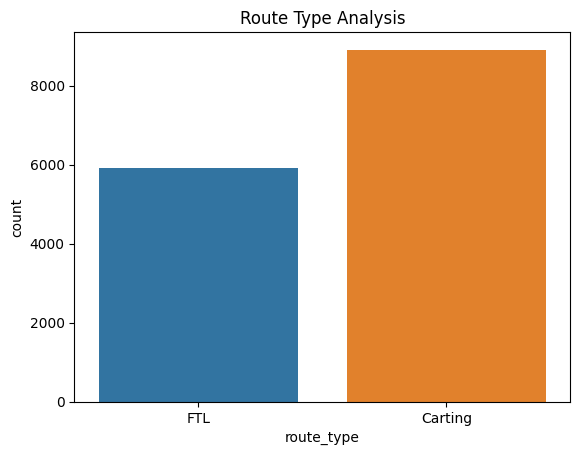

In [32]:
plt.title("Route Type Analysis")
sns.countplot(data=data,x = 'route_type')
plt.show()

In [33]:
def get_quartile_values(data,title):
    Q1,Q3 = np.percentile(data,[25,75])
    IQR = Q3-Q1
    left_wisker = Q1-(1.5)*IQR
    right_wisker = Q3+(1.5)*IQR
    plt.title("Outlier Detection for "+title+" Feature")
    sns.boxplot(data=data,orient='h')
    plt.show()

    return (Q1,Q3,left_wisker,right_wisker)

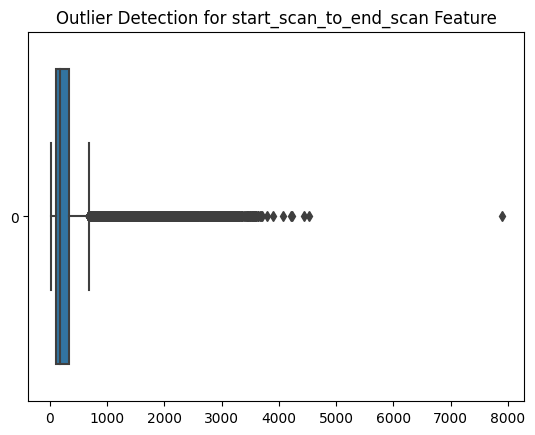

Q1: 104.0,Q3 : 334.0, left_wisker:-241.0,right_wisker:679.0


In [34]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['start_scan_to_end_scan'],'start_scan_to_end_scan')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

# Cleaned start_scan_to_end_scan feature after removing outliers

In [35]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['start_scan_to_end_scan'] = data.loc[(data['start_scan_to_end_scan'] >=leftwisker)&(data['start_scan_to_end_scan'] <=rightwisker)]['start_scan_to_end_scan']
data['start_scan_to_end_scan'] = np.log(data['start_scan_to_end_scan'])

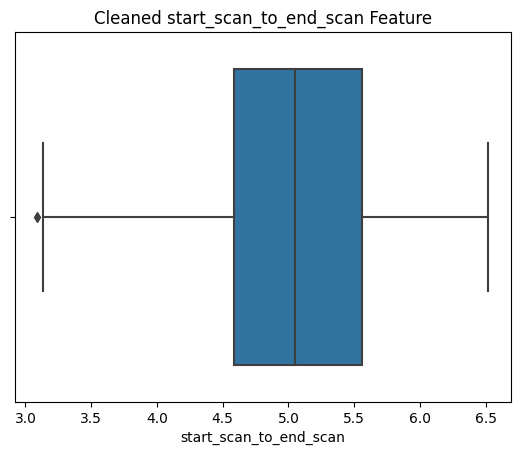

In [36]:
plt.title('Cleaned start_scan_to_end_scan Feature')
sns.boxplot(data=data,x='start_scan_to_end_scan')
plt.show()

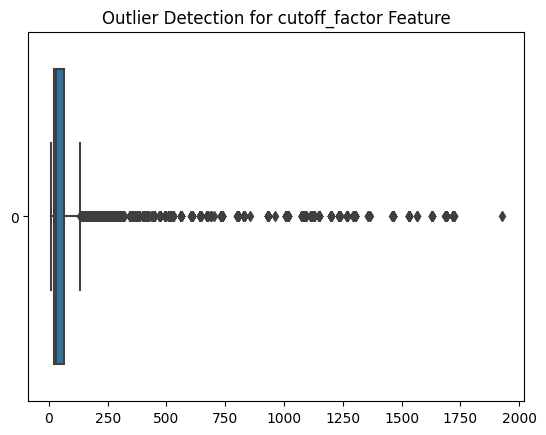

Q1: 20.0,Q3 : 65.0, left_wisker:-47.5,right_wisker:132.5


In [37]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['cutoff_factor'],'cutoff_factor')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [38]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['cutoff_factor'] = data.loc[(data['cutoff_factor'] >=leftwisker)&(data['cutoff_factor'] <=rightwisker)]['cutoff_factor']
data['cutoff_factor'] = np.log(data['cutoff_factor'])

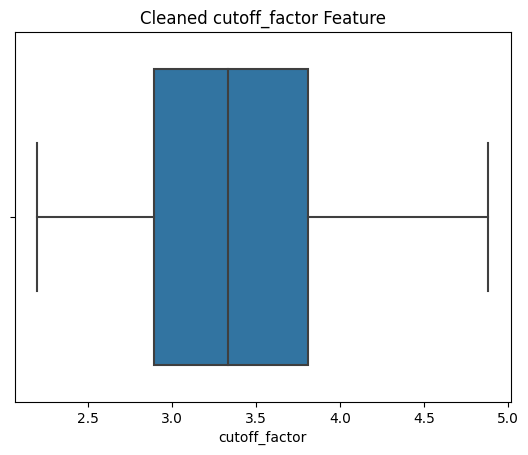

In [39]:
plt.title('Cleaned cutoff_factor Feature')
sns.boxplot(data=data,x='cutoff_factor')
plt.show()

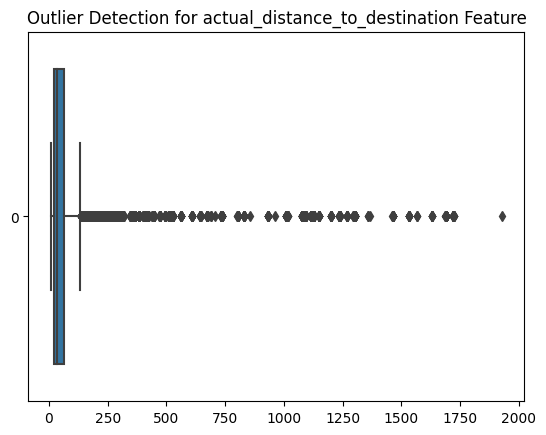

Q1: 20.098971767647942,Q3 : 65.81230959743395, left_wisker:-48.47103497703108,right_wisker:134.38231634211297


In [40]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['actual_distance_to_destination'],'actual_distance_to_destination')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [41]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['actual_distance_to_destination'] = data.loc[(data['actual_distance_to_destination'] >=leftwisker)&(data['actual_distance_to_destination'] <=rightwisker)]['actual_distance_to_destination']
data['actual_distance_to_destination'] = np.log(data['actual_distance_to_destination'])

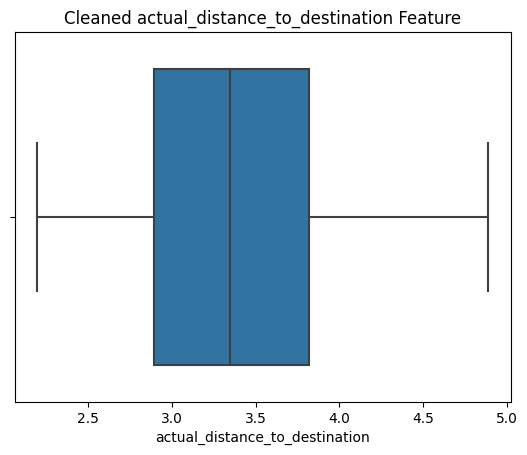

In [42]:
plt.title('Cleaned actual_distance_to_destination Feature')
sns.boxplot(data=data,x='actual_distance_to_destination')
plt.show()

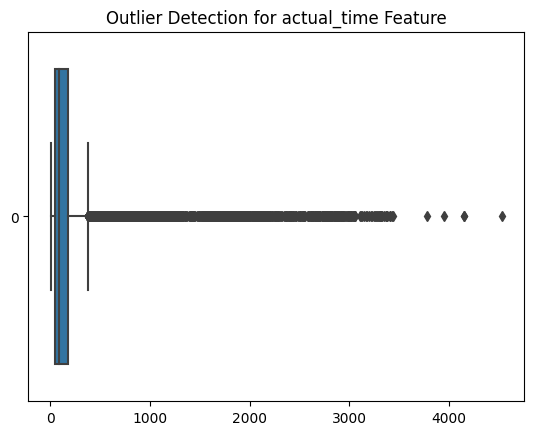

Q1: 51.0,Q3 : 182.0, left_wisker:-145.5,right_wisker:378.5


In [43]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['actual_time'],'actual_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [44]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['actual_time'] = data.loc[(data['actual_time'] >=leftwisker)&(data['actual_time'] <=rightwisker)]['actual_time']
data['actual_time'] = np.log(data['actual_time'])

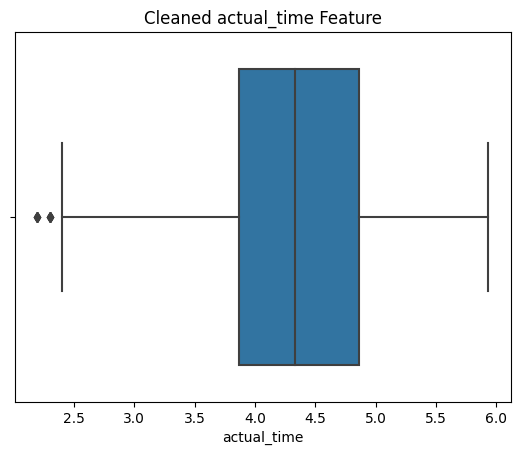

In [45]:
plt.title('Cleaned actual_time Feature')
sns.boxplot(data=data,x='actual_time')
plt.show()

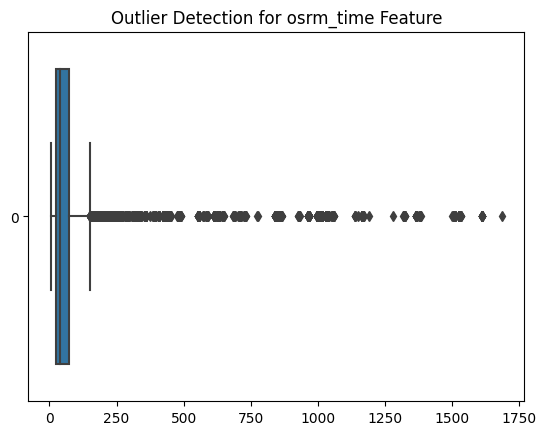

Q1: 23.0,Q3 : 74.0, left_wisker:-53.5,right_wisker:150.5


In [46]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['osrm_time'],'osrm_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [47]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['osrm_time'] = data.loc[(data['osrm_time'] >=leftwisker)&(data['osrm_time'] <=rightwisker)]['osrm_time']
data['osrm_time'] = np.log(data['osrm_time'])

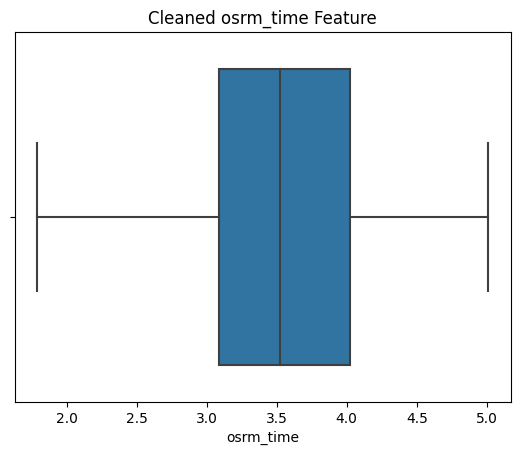

In [48]:
plt.title('Cleaned osrm_time Feature')
sns.boxplot(data=data,x='osrm_time')
plt.show()

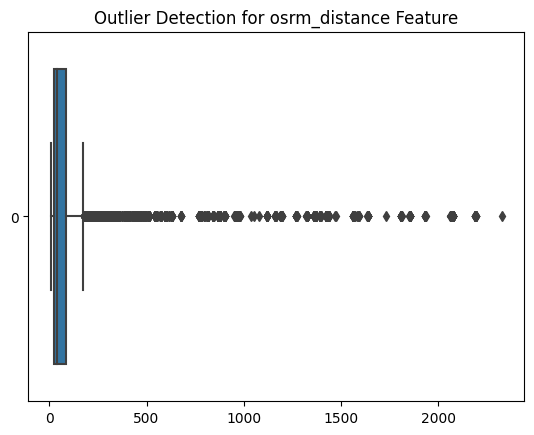

Q1: 26.0408,Q3 : 86.1399, left_wisker:-64.10784999999998,right_wisker:176.28855


In [49]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['osrm_distance'],'osrm_distance')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [50]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['osrm_distance'] = data.loc[(data['osrm_distance'] >=leftwisker)&(data['osrm_distance'] <=rightwisker)]['osrm_distance']
data['osrm_distance'] = np.log(data['osrm_distance'])

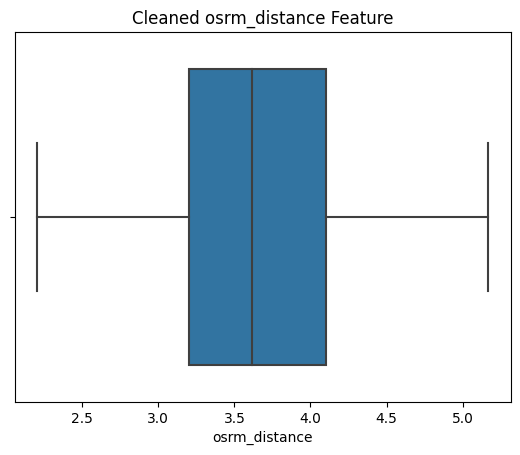

In [51]:
plt.title('Cleaned osrm_distance Feature')
sns.boxplot(data=data,x='osrm_distance')
plt.show()

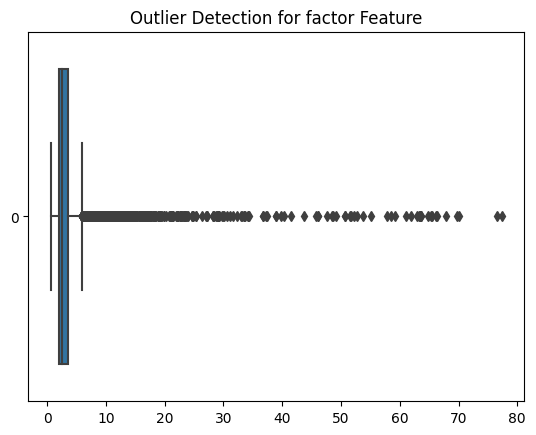

Q1: 1.968944099378882,Q3 : 3.5625, left_wisker:-0.4213897515527951,right_wisker:5.952833850931677


In [52]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['factor'],'factor')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [53]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['factor'] = data.loc[(data['factor'] >=leftwisker)&(data['factor'] <=rightwisker)]['factor']
data['factor'] = np.log(data['factor'])

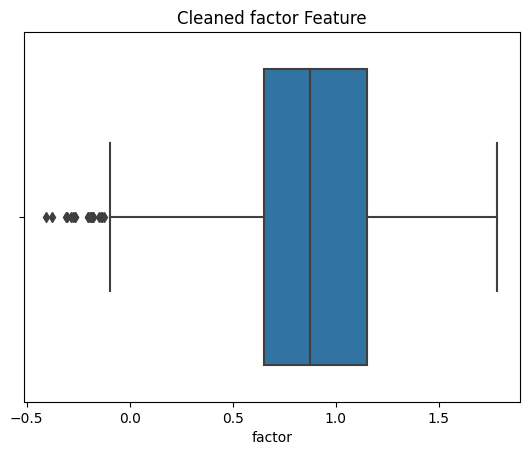

In [54]:
plt.title('Cleaned factor Feature')
sns.boxplot(data=data,x='factor')
plt.show()

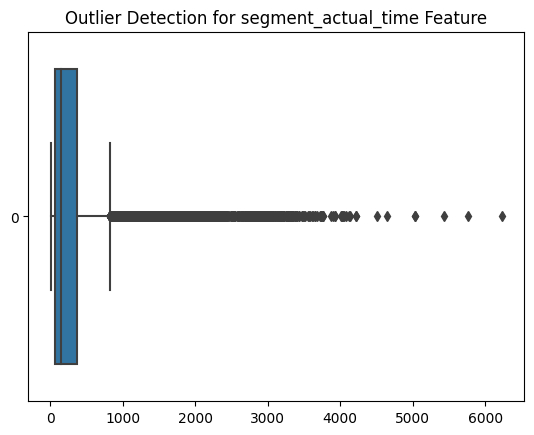

Q1: 66.0,Q3 : 367.0, left_wisker:-385.5,right_wisker:818.5


In [55]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_actual_time'],'segment_actual_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [56]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_actual_time'] = data.loc[(data['segment_actual_time'] >=leftwisker)&(data['segment_actual_time'] <=rightwisker)]['segment_actual_time']
data['segment_actual_time'] = np.log(data['segment_actual_time'])

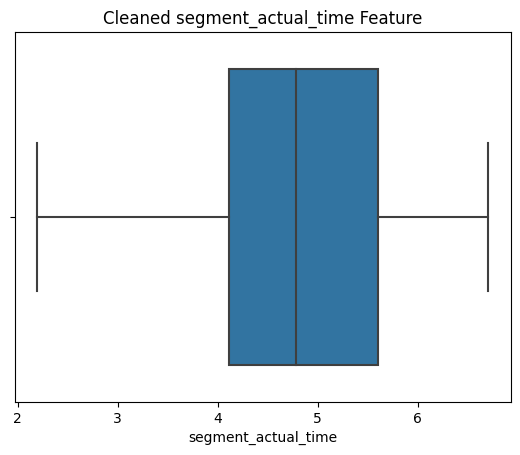

In [57]:
plt.title('Cleaned segment_actual_time Feature')
sns.boxplot(data=data,x='segment_actual_time')
plt.show()

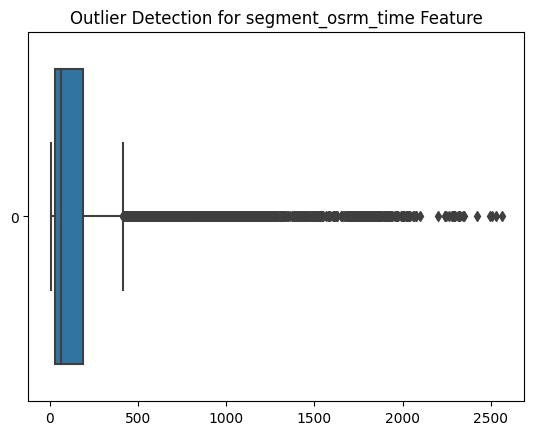

Q1: 31.0,Q3 : 185.0, left_wisker:-200.0,right_wisker:416.0


In [58]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_osrm_time'],'segment_osrm_time')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [59]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_osrm_time'] = data.loc[(data['segment_osrm_time'] >=leftwisker)&(data['segment_osrm_time'] <=rightwisker)]['segment_osrm_time']
data['segment_osrm_time'] = np.log(data['segment_osrm_time'])

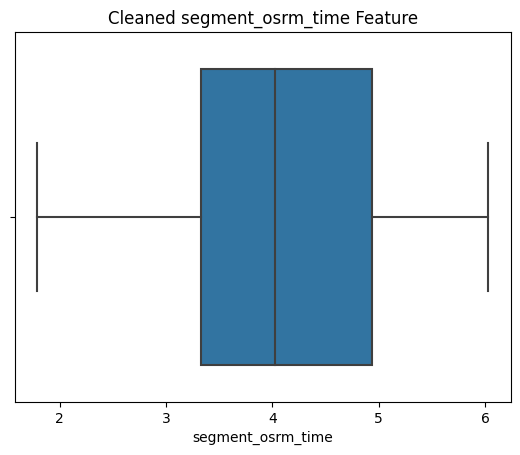

In [60]:
plt.title('Cleaned segment_osrm_time Feature')
sns.boxplot(data=data,x='segment_osrm_time')
plt.show()

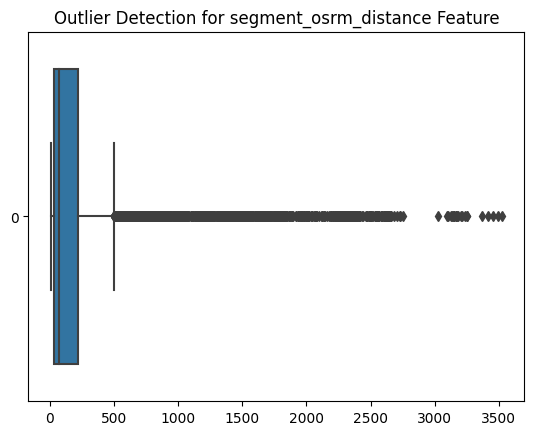

Q1: 32.6545,Q3 : 218.8024, left_wisker:-246.56735000000003,right_wisker:498.02425000000005


In [61]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['segment_osrm_distance'],'segment_osrm_distance')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [62]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['segment_osrm_distance'] = data.loc[(data['segment_osrm_distance'] >=leftwisker)&(data['segment_osrm_distance'] <=rightwisker)]['segment_osrm_distance']
data['segment_osrm_distance'] = np.log(data['segment_osrm_distance'])

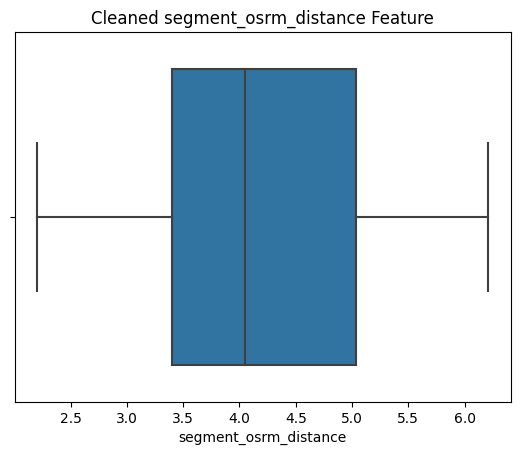

In [63]:
plt.title('Cleaned segment_osrm_distance Feature')
sns.boxplot(data=data,x='segment_osrm_distance')
plt.show()

In [64]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,NaN,False,NaN,2018-09-13 12:40:43,NaN,NaN,NaN,NaN,1.051781,NaN,NaN,NaN,7.333333,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,4.060443,False,3.871201,2018-09-12 02:41:24,3.882448,4.564348,3.737670,4.041499,0.826679,4.948760,4.174387,4.433069,6.666667,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,NaN,False,NaN,2018-09-14 16:54:36,NaN,NaN,NaN,NaN,1.058511,NaN,NaN,NaN,1.615385,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana),2018,09,12
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,4.605170,False,2.833213,2018-09-12 01:13:56,2.843471,4.077537,2.708050,2.979603,1.369487,4.077537,2.772589,2.989543,5.142857,Gurgaon,Bilaspur,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra),2018,09,12
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,5.023881,False,3.258097,2018-09-12 01:47:26,3.280931,4.143135,3.295837,3.386747,1.161791,5.828946,4.744932,4.989016,5.800000,Bellary,Bilaspur,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka),2018,09,12


# Check for NA Values after removing outliers

In [65]:
data.isna().sum()

trip_uuid                            0
trip_creation_time                   0
route_schedule_uuid                  0
route_type                           0
source_name                          0
destination_name                     0
od_start_time                        0
od_end_time                          0
start_scan_to_end_scan            1588
is_cutoff                            0
cutoff_factor                     2132
cutoff_timestamp                     0
actual_distance_to_destination    2132
actual_time                       1868
osrm_time                         1853
osrm_distance                     1940
factor                            1356
segment_actual_time               1643
segment_osrm_time                 1492
segment_osrm_distance             1548
segment_factor                       0
source_city                          0
source_place                         0
source_code                          0
destination_city                     0
destination_place        

# Treating Missing Values

In [66]:
data['start_scan_to_end_scan'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['start_scan_to_end_scan']))
data['cutoff_factor'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['cutoff_factor']))
data['actual_distance_to_destination'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['actual_distance_to_destination']))
data['actual_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['actual_time']))
data['osrm_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['osrm_time']))
data['osrm_distance'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['osrm_distance']))
data['factor'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['factor']))
data['segment_actual_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_actual_time']))
data['segment_osrm_time'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_osrm_time']))
data['segment_osrm_distance'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['segment_osrm_distance']))

In [67]:
data.isna().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_name                       0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
source_city                       0
source_place                      0
source_code                       0
destination_city                  0
destination_place                 0
destination_code                  0
trip_creation_year          

In [68]:
data['od_start_time'] = pd.to_datetime(data['od_start_time'])
data['od_end_time'] = pd.to_datetime(data['od_end_time'])

# Calculating Time Taken between od_start and od_end_time

In [69]:
data['od_start_end_time_diff'] = (data['od_end_time']-data['od_start_time']).astype('timedelta64[h]')

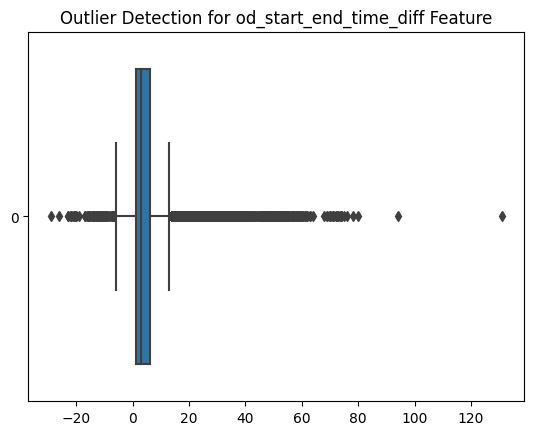

Q1: 1.0,Q3 : 6.0, left_wisker:-6.5,right_wisker:13.5


In [70]:
Q1,Q3,leftwisker,rightwisker = get_quartile_values(data['od_start_end_time_diff'],'od_start_end_time_diff')
print(f'Q1: {Q1},Q3 : {Q3}, left_wisker:{leftwisker},right_wisker:{rightwisker}')

In [71]:
# getting the data which is lying between quratile and converting data to normal using np.log()

data['od_start_end_time_diff'] = data.loc[(data['od_start_end_time_diff'] >=leftwisker)&(data['od_start_end_time_diff'] <=rightwisker)]['od_start_end_time_diff']
#data['od_start_end_time_diff'] = np.log(data['od_start_end_time_diff'])

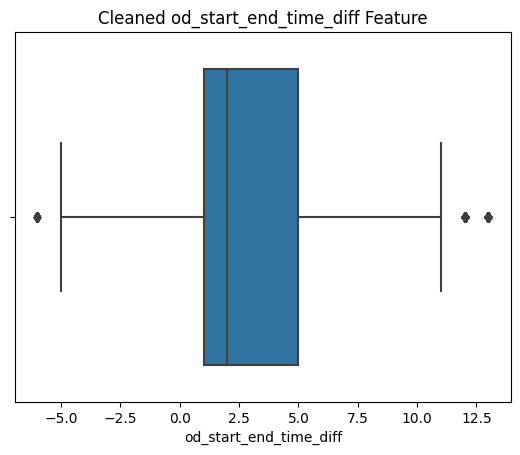

In [72]:
plt.title('Cleaned od_start_end_time_diff Feature')
sns.boxplot(data=data,x='od_start_end_time_diff')
plt.show()

In [73]:
data['od_start_end_time_diff'] = SimpleImputer(missing_values=pd.NA,strategy='mean').fit_transform(pd.DataFrame(data['od_start_end_time_diff']))

In [74]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,5.072029,False,3.355085,2018-09-13 12:40:43,3.375730,4.372389,3.556634,3.653200,1.051781,4.844763,4.103296,4.199195,7.333333,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12,0.0
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,4.060443,False,3.871201,2018-09-12 02:41:24,3.882448,4.564348,3.737670,4.041499,0.826679,4.948760,4.174387,4.433069,6.666667,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12,0.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,5.072029,False,3.355085,2018-09-14 16:54:36,3.375730,4.372389,3.556634,3.653200,1.058511,4.844763,4.103296,4.199195,1.615385,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana),2018,09,12,0.0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,4.605170,False,2.833213,2018-09-12 01:13:56,2.843471,4.077537,2.708050,2.979603,1.369487,4.077537,2.772589,2.989543,5.142857,Gurgaon,Bilaspur,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra),2018,09,12,1.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,5.023881,False,3.258097,2018-09-12 01:47:26,3.280931,4.143135,3.295837,3.386747,1.161791,5.828946,4.744932,4.989016,5.800000,Bellary,Bilaspur,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka),2018,09,12,3.0


# Standardising data Before Doing Hypothesis testing

In [75]:
data['start_scan_to_end_scan'] = StandardScaler().fit_transform(pd.DataFrame(data['start_scan_to_end_scan']))
data['cutoff_factor'] = StandardScaler().fit_transform(pd.DataFrame(data['cutoff_factor']))
data['actual_distance_to_destination'] = StandardScaler().fit_transform(pd.DataFrame(data['actual_distance_to_destination']))
data['actual_time'] = StandardScaler().fit_transform(pd.DataFrame(data['actual_time']))
data['osrm_time'] = StandardScaler().fit_transform(pd.DataFrame(data['osrm_time']))
data['osrm_distance'] = StandardScaler().fit_transform(pd.DataFrame(data['osrm_distance']))
data['factor'] = StandardScaler().fit_transform(pd.DataFrame(data['factor']))
data['segment_actual_time'] = StandardScaler().fit_transform(pd.DataFrame(data['segment_actual_time']))
data['segment_osrm_time'] = StandardScaler().fit_transform(pd.DataFrame(data['segment_osrm_time']))
data['segment_osrm_distance'] = StandardScaler().fit_transform(pd.DataFrame(data['segment_osrm_distance']))
data['segment_factor'] = StandardScaler().fit_transform(pd.DataFrame(data['segment_factor']))
data['od_start_end_time_diff'] = StandardScaler().fit_transform(pd.DataFrame(data['od_start_end_time_diff']))

# Compare the difference between od_start_end_time_diff and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check

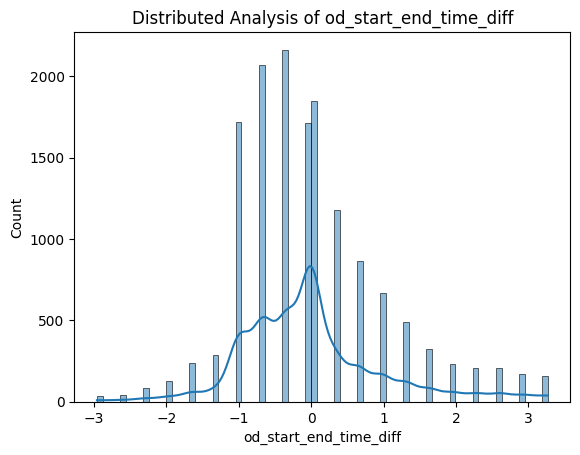

In [76]:
plt.title('Distributed Analysis of od_start_end_time_diff')
sns.histplot(data['od_start_end_time_diff'],kde=True)
plt.show()

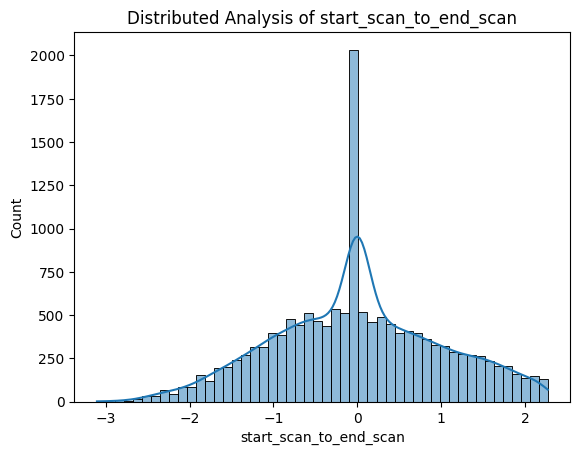

In [77]:
plt.title('Distributed Analysis of start_scan_to_end_scan')
sns.histplot(data['start_scan_to_end_scan'],kde=True)
plt.show()

# Hypothesis testing to check whether od_start_end_time_diff and start_scan_to_end_scan is same or different.

Two Tail t-test

M1 : Mean of od_start_end_time_diff feature.

M2 : Mean of start_scan_to_end_scan feature.
    
H0 : M1=M2

Ha : M1!=M2

In [78]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['od_start_end_time_diff'],data['start_scan_to_end_scan'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.99999999999997
Fail to Reject Null Hypothesis


In [79]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,-1.391534e-15,False,0.000000,2018-09-13 12:40:43,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.419613,1.011553e-15,-9.807944e-16,0.000000,0.340536,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12,-0.991834
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,-1.584880e+00,False,0.865891,2018-09-12 02:41:24,8.659424e-01,0.295149,0.304889,6.361493e-01,-0.225651,1.184425e-01,7.850465e-02,0.252365,0.281347,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12,-0.991834
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,-1.391534e-15,False,0.000000,2018-09-14 16:54:36,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.438904,1.011553e-15,-9.807944e-16,0.000000,-0.167125,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana),2018,09,12,-0.991834
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,-7.314408e-01,False,-0.875546,2018-09-12 01:13:56,-9.095923e-01,-0.453354,-1.429131,-1.103554e+00,1.330329,-8.737994e-01,-1.469468e+00,-1.305291,0.146057,Gurgaon,Bilaspur,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra),2018,09,12,-0.664062
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,-7.543561e-02,False,-0.162718,2018-09-12 01:47:26,-1.620046e-01,-0.352494,-0.439218,-4.365306e-01,0.734961,1.120893e+00,7.085438e-01,0.852267,0.204401,Bellary,Bilaspur,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka),2018,09,12,-0.008517


# Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

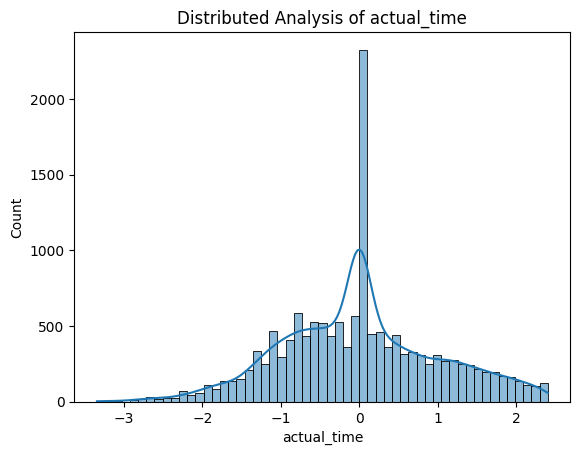

In [80]:
plt.title('Distributed Analysis of actual_time')
sns.histplot(data['actual_time'],kde=True)
plt.show()

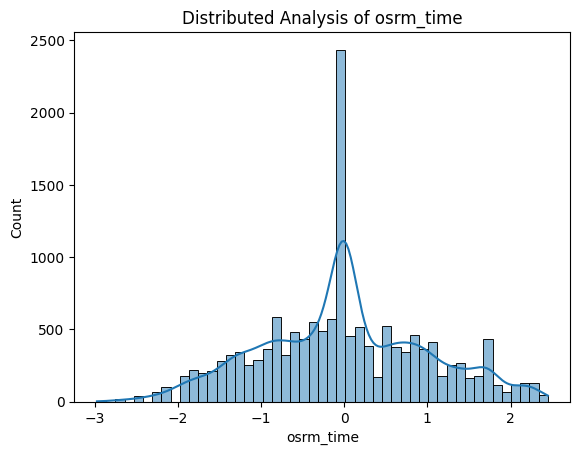

In [81]:
plt.title('Distributed Analysis of osrm_time')
sns.histplot(data['osrm_time'],kde=True)
plt.show()

Two Tail t-test

M1 : Mean of actual_time feature.

M2 : Mean of osrm_time feature.
    
H0 : M1=M2

Ha : M1!=M2

In [82]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['osrm_time'],data['actual_time'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.9999999999999296
Fail to Reject Null Hypothesis


# Hence We can say that osrm_time and actual_time feature follow same normal distribution.

# Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

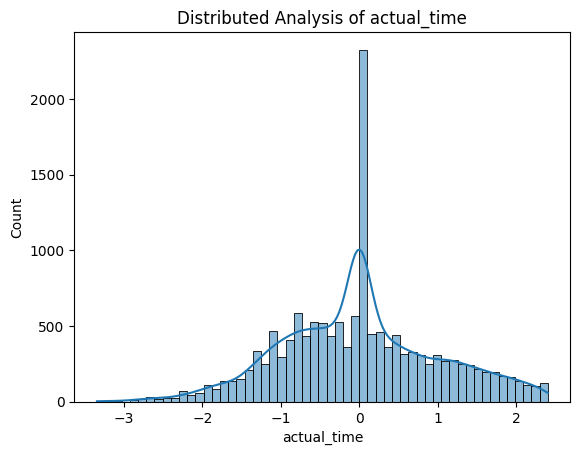

In [83]:
plt.title('Distributed Analysis of actual_time')
sns.histplot(data['actual_time'],kde=True)
plt.show()

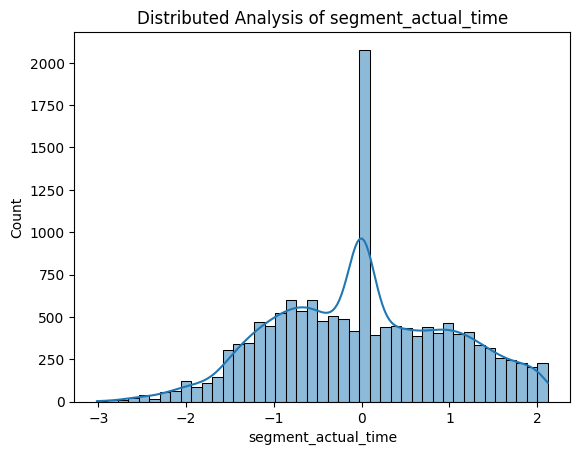

In [84]:
plt.title('Distributed Analysis of segment_actual_time')
sns.histplot(data['segment_actual_time'],kde=True)
plt.show()

Two Tail t-test

M1 : Mean of actual_time feature.

M2 : Mean of segment_actual_time feature.
    
H0 : M1=M2

Ha : M1!=M2

In [85]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['actual_time'],data['segment_actual_time'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.9999999999999043
Fail to Reject Null Hypothesis


# Hence We can say that actual_time and segment_actual_time feature follow same normal distribution.

# Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

In [86]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,-1.391534e-15,False,0.000000,2018-09-13 12:40:43,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.419613,1.011553e-15,-9.807944e-16,0.000000,0.340536,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12,-0.991834
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,-1.584880e+00,False,0.865891,2018-09-12 02:41:24,8.659424e-01,0.295149,0.304889,6.361493e-01,-0.225651,1.184425e-01,7.850465e-02,0.252365,0.281347,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12,-0.991834
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,-1.391534e-15,False,0.000000,2018-09-14 16:54:36,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.438904,1.011553e-15,-9.807944e-16,0.000000,-0.167125,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana),2018,09,12,-0.991834
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,-7.314408e-01,False,-0.875546,2018-09-12 01:13:56,-9.095923e-01,-0.453354,-1.429131,-1.103554e+00,1.330329,-8.737994e-01,-1.469468e+00,-1.305291,0.146057,Gurgaon,Bilaspur,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra),2018,09,12,-0.664062
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,-7.543561e-02,False,-0.162718,2018-09-12 01:47:26,-1.620046e-01,-0.352494,-0.439218,-4.365306e-01,0.734961,1.120893e+00,7.085438e-01,0.852267,0.204401,Bellary,Bilaspur,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka),2018,09,12,-0.008517


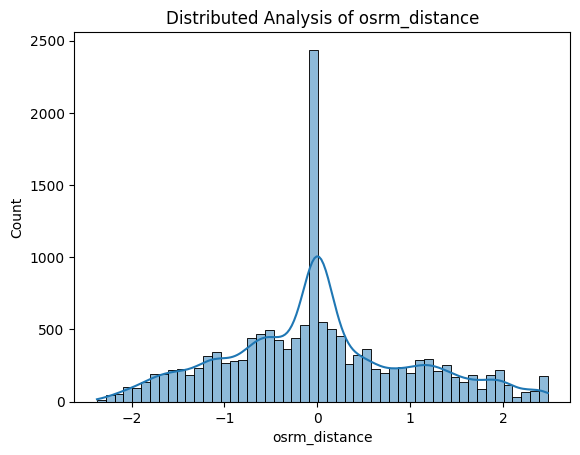

In [87]:
plt.title('Distributed Analysis of osrm_distance')
sns.histplot(data['osrm_distance'],kde=True)
plt.show()

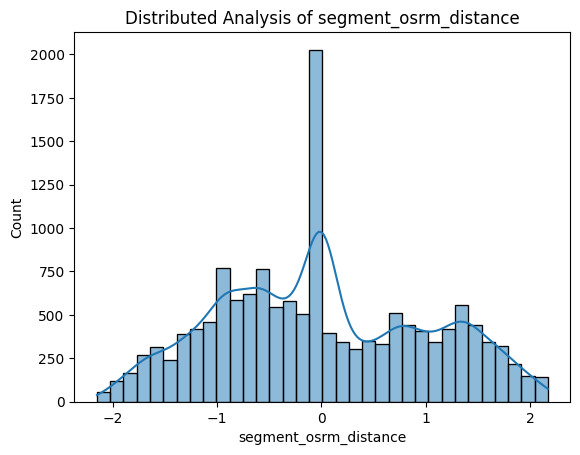

In [88]:
plt.title('Distributed Analysis of segment_osrm_distance')
sns.histplot(data['segment_osrm_distance'],kde=True)
plt.show()

Two Tail t-test

M1 : Mean of osrm_distance feature.

M2 : Mean of segment_osrm_distance feature.
    
H0 : M1=M2

Ha : M1!=M2

In [89]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['segment_osrm_distance'],data['osrm_distance'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.9999999999999623
Fail to Reject Null Hypothesis


# Hence We can say that segment_osrm_distance and osrm_distance feature follow same normal distribution.

# Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

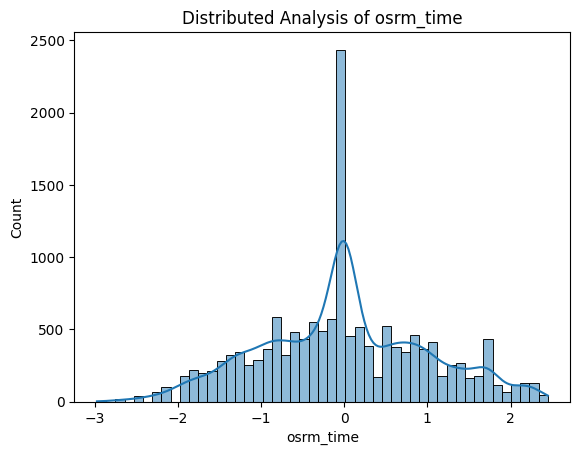

In [90]:
plt.title('Distributed Analysis of osrm_time')
sns.histplot(data['osrm_time'],kde=True)
plt.show()

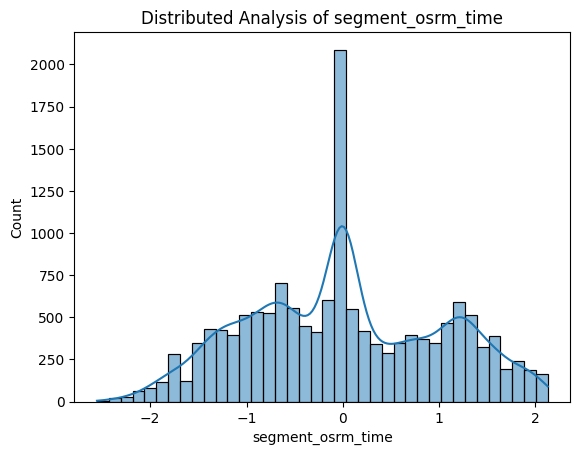

In [91]:
plt.title('Distributed Analysis of segment_osrm_time')
sns.histplot(data['segment_osrm_time'],kde=True)
plt.show()

Two Tail t-test

M1 : Mean of osrm_time feature.

M2 : Mean of segment_osrm_time feature.
    
H0 : M1=M2

Ha : M1!=M2

In [92]:
alpha = 0.05
test_stat,p_value = ttest_ind(data['segment_osrm_time'],data['osrm_time'])
print(f'p_Value :{p_value}')
if(p_value < alpha):
    print("Reject NULL Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_Value :0.9999999999999053
Fail to Reject Null Hypothesis


# Hence We can say that segment_osrm_time and osrm_time feature follow same normal distribution.

In [93]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,-1.391534e-15,False,0.000000,2018-09-13 12:40:43,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.419613,1.011553e-15,-9.807944e-16,0.000000,0.340536,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12,-0.991834
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,-1.584880e+00,False,0.865891,2018-09-12 02:41:24,8.659424e-01,0.295149,0.304889,6.361493e-01,-0.225651,1.184425e-01,7.850465e-02,0.252365,0.281347,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12,-0.991834
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,-1.391534e-15,False,0.000000,2018-09-14 16:54:36,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.438904,1.011553e-15,-9.807944e-16,0.000000,-0.167125,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana),2018,09,12,-0.991834
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,-7.314408e-01,False,-0.875546,2018-09-12 01:13:56,-9.095923e-01,-0.453354,-1.429131,-1.103554e+00,1.330329,-8.737994e-01,-1.469468e+00,-1.305291,0.146057,Gurgaon,Bilaspur,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra),2018,09,12,-0.664062
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,-7.543561e-02,False,-0.162718,2018-09-12 01:47:26,-1.620046e-01,-0.352494,-0.439218,-4.365306e-01,0.734961,1.120893e+00,7.085438e-01,0.852267,0.204401,Bellary,Bilaspur,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka),2018,09,12,-0.008517


# Which Cities has Maximum Orders

In [94]:
df_city = data['destination_city'].value_counts()[:10]

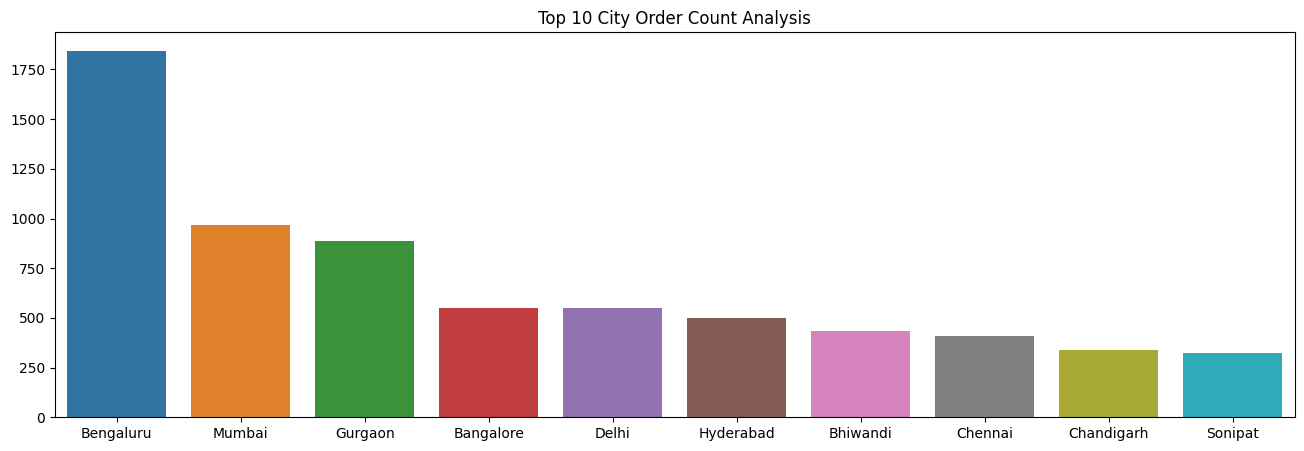

In [95]:
plt.figure(figsize=(16,5))
plt.title('Top 10 City Order Count Analysis')
sns.barplot(x=list(df_city.index),y=list(df_city.values))
plt.show()

# Which Place has maximum number of orders

In [96]:
df_place = data['destination_place'].value_counts()[:10]

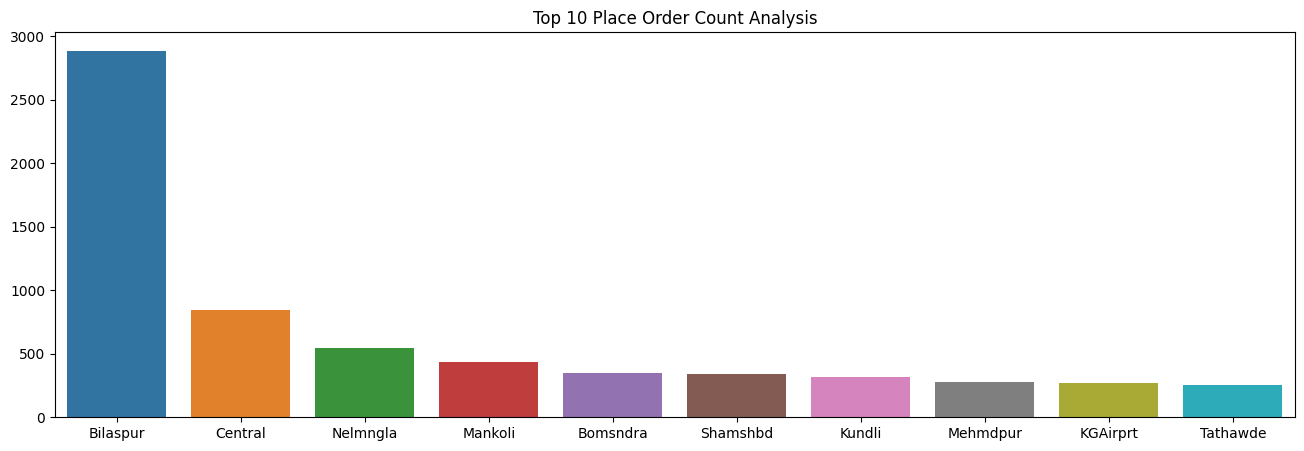

In [97]:
plt.figure(figsize=(16,5))
plt.title('Top 10 Place Order Count Analysis')
sns.barplot(x=list(df_place.index),y=list(df_place.values))
plt.show()

In [98]:
df_code = data['destination_code'].value_counts()[:10]
df_code

HB (Haryana)         829
HB (Karnataka)       614
H (Karnataka)        561
I (Maharashtra)      413
HB (Maharashtra)     403
D (Uttar Pradesh)    351
D (Tamil Nadu)       320
H (Telangana)        280
H (Punjab)           271
D (Maharashtra)      269
Name: destination_code, dtype: int64

# Which Place Code has maximum number of orders

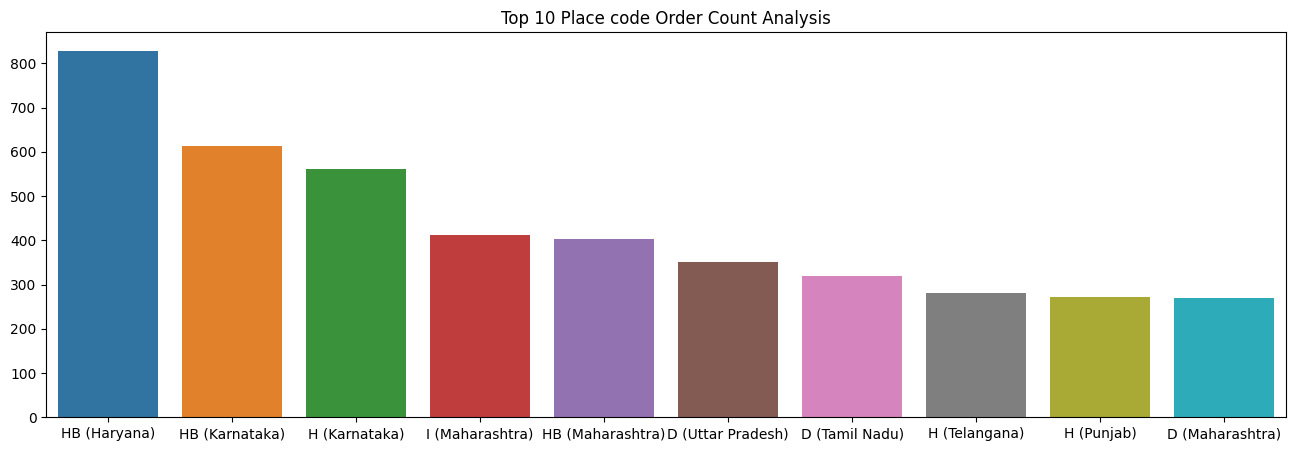

In [99]:
plt.figure(figsize=(16,5))
plt.title('Top 10 Place code Order Count Analysis')
sns.barplot(x=list(df_code.index),y=list(df_code.values))
plt.show()

In [100]:
data['route_type'] = LabelEncoder().fit_transform(pd.DataFrame(data['route_type']))
data['is_cutoff'] = LabelEncoder().fit_transform(pd.DataFrame(data['is_cutoff']))

C:\Users\gaura\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,-1.391534e-15,0,0.000000,2018-09-13 12:40:43,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.419613,1.011553e-15,-9.807944e-16,0.000000,0.340536,Kanpur,Central,H6 (Uttar Pradesh),Kanpur,Central,H6 (Uttar Pradesh),2018,09,12,-0.991834
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,-1.584880e+00,0,0.865891,2018-09-12 02:41:24,8.659424e-01,0.295149,0.304889,6.361493e-01,-0.225651,1.184425e-01,7.850465e-02,0.252365,0.281347,Doddablpur,ChikaDPP,D (Karnataka),Doddablpur,ChikaDPP,D (Karnataka),2018,09,12,-0.991834
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,-1.391534e-15,0,0.000000,2018-09-14 16:54:36,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.438904,1.011553e-15,-9.807944e-16,0.000000,-0.167125,Gurgaon,Bilaspur,HB (Haryana),Gurgaon,Bilaspur,HB (Haryana),2018,09,12,-0.991834
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,-7.314408e-01,0,-0.875546,2018-09-12 01:13:56,-9.095923e-01,-0.453354,-1.429131,-1.103554e+00,1.330329,-8.737994e-01,-1.469468e+00,-1.305291,0.146057,Gurgaon,Bilaspur,Mumbai Hub (Maharashtra),Mumbai,MiraRd,IP (Maharashtra),2018,09,12,-0.664062
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,-7.543561e-02,0,-0.162718,2018-09-12 01:47:26,-1.620046e-01,-0.352494,-0.439218,-4.365306e-01,0.734961,1.120893e+00,7.085438e-01,0.852267,0.204401,Bellary,Bilaspur,Dc (Karnataka),Sandur,WrdN1DPP,D (Karnataka),2018,09,12,-0.008517


In [102]:
te = TargetEncoder()

In [103]:
data['source_name'] = te.fit_transform(data['source_name'],data['route_type'])
data['destination_name'] = te.fit_transform(data['destination_name'],data['route_type'])
data['source_city'] = te.fit_transform(data['source_city'],data['route_type'])
data['source_place'] = te.fit_transform(data['source_place'],data['route_type'])
data['source_code'] = te.fit_transform(data['source_code'],data['route_type'])
data['destination_city'] = te.fit_transform(data['destination_city'],data['route_type'])
data['destination_place'] = te.fit_transform(data['destination_place'],data['route_type'])
data['destination_code'] = te.fit_transform(data['destination_code'],data['route_type'])


# Recommendation for Bussiness

1. It is observed that Bilaspur has high rate of orders so bussiness can provide discount to them in near future for more growth.
2. It is observed that bengaluru city has high rate of orders.
3. It is observed that Haryana State has high rate of orders followed by karnataka.
4. It is also observed that users are prefering Carting as compare to FTL.

# Final Data for forcasting model

In [104]:
data.head()

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_date,od_start_end_time_diff
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,0.572639,7.576962e-01,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,-1.391534e-15,0,0.000000,2018-09-13 12:40:43,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.419613,1.011553e-15,-9.807944e-16,0.000000,0.340536,0.462069,0.393424,0.572639,0.486486,5.398335e-01,7.576962e-01,2018,09,12,-0.991834
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,0.275161,2.751609e-01,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,-1.584880e+00,0,0.865891,2018-09-12 02:41:24,8.659424e-01,0.295149,0.304889,6.361493e-01,-0.225651,1.184425e-01,7.850465e-02,0.252365,0.281347,0.275161,0.275161,0.555555,0.275161,2.751609e-01,6.349206e-01,2018,09,12,-0.991834
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,0.499534,4.427021e-01,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,-1.391534e-15,0,0.000000,2018-09-14 16:54:36,-1.517831e-15,0.000000,0.000000,7.275507e-16,0.438904,1.011553e-15,-9.807944e-16,0.000000,-0.167125,0.328867,0.409031,0.499534,0.414689,3.900242e-01,4.427021e-01,2018,09,12,-0.991834
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,0.026667,2.722041e-08,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,-7.314408e-01,0,-0.875546,2018-09-12 01:13:56,-9.095923e-01,-0.453354,-1.429131,-1.103554e+00,1.330329,-8.737994e-01,-1.469468e+00,-1.305291,0.146057,0.328867,0.409031,0.026667,0.000000,2.722041e-08,2.722041e-08,2018,09,12,-0.664062
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,0.669439,5.489426e-01,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,-7.543561e-02,0,-0.162718,2018-09-12 01:47:26,-1.620046e-01,-0.352494,-0.439218,-4.365306e-01,0.734961,1.120893e+00,7.085438e-01,0.852267,0.204401,0.669439,0.409031,0.699399,0.548943,5.489426e-01,6.349206e-01,2018,09,12,-0.008517
